In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [6]:
# Create a set of random lats and longs

lats = np.random.uniform(-90.000, 90.000, size=1500)

longs = np.random.uniform(-180.000, 180.000, size=1500)

lat_longs = zip(lats, longs)

lat_longs

In [7]:
coordinates = list(lat_longs)

In [8]:
# Create new list to hold city names

cities = []

for coordinate in coordinates:

    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    if city not in cities:

        cities.append(city)

len(cities)

605

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Empty list to hold weather data
city_data = []

print('Beginning Data Retrieval     ')

print('-----------------------------')

# Create counters
record_count = 1

set_count = 1

# Loop through all cities in city list
for i, city in enumerate(cities):

    # Grouping cities in set of 50 for logging
    if (i % 50 == 0 and i >= 50):

        set_count += 1

        record_count = 1

        time.sleep(60)

    # Create endpoint URL for each city
    city_url = url + '&q=' + city.replace(' ','+')

    # Log the URL, record, and set numbers and the city
    print(f'Processing record {record_count} of set {set_count} | {city}')

    # Add 1 to record count
    record_count += 1

    try:

        city_weather = requests.get(city_url).json()

        city_lat = city_weather['coord']['lat']

        city_long = city_weather['coord']['lon']

        city_max_temp = city_weather['main']['temp_max']

        city_humidity = city_weather['main']['humidity']

        city_clouds = city_weather['clouds']['all']

        city_wind = city_weather['wind']['speed']

        city_country = city_weather['sys']['country']

        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        city_data.append({'City': city.title(),
                            'Lat': city_lat,
                            'Long': city_long,
                            'Max Temp': city_max_temp,
                            'Humidity': city_humidity,
                            'Cloudiness': city_clouds,
                            'Wind Speed': city_wind,
                            'Country': city_country,
                            'Date': city_date})

    except:

        print('City not found. Skipping...')

        pass

# Indicate the data loading is complete

print('-----------------------------')

print('Data Retrieval Complete      ')

print('-----------------------------')


Beginning Data Retrieval     
-----------------------------
Processing record 1 of set 1 | grand forks
Processing record 2 of set 1 | taolanaro
City not found. Skipping...
Processing record 3 of set 1 | upernavik
Processing record 4 of set 1 | gobabis
Processing record 5 of set 1 | sorong
Processing record 6 of set 1 | albany
Processing record 7 of set 1 | conde
Processing record 8 of set 1 | carnarvon
Processing record 9 of set 1 | abonnema
Processing record 10 of set 1 | mataura
Processing record 11 of set 1 | tsihombe
City not found. Skipping...
Processing record 12 of set 1 | highland park
Processing record 13 of set 1 | cabo san lucas
Processing record 14 of set 1 | esperance
Processing record 15 of set 1 | ribeira grande
Processing record 16 of set 1 | punta arenas
Processing record 17 of set 1 | jiamusi
Processing record 18 of set 1 | christchurch
Processing record 19 of set 1 | hobart
Processing record 20 of set 1 | hithadhoo
Processing record 21 of set 1 | karaton
Processing r

In [11]:
len(city_data)

555

In [13]:
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grand Forks,47.9417,-97.4337,30.13,93,100,20.71,US,2022-04-12 20:13:06
1,Upernavik,72.7868,-56.1549,12.04,92,100,9.64,GL,2022-04-12 20:16:16
2,Gobabis,-22.4500,18.9667,73.96,35,100,5.73,NA,2022-04-12 20:16:16
3,Sorong,-0.8833,131.2500,81.55,76,100,5.79,ID,2022-04-12 20:16:16
4,Albany,42.6001,-73.9662,68.04,35,0,3.00,US,2022-04-12 20:15:07
5,Conde,-7.2597,-34.9075,81.86,74,20,9.22,BR,2022-04-12 20:16:17
6,Carnarvon,-24.8667,113.6333,60.87,77,0,9.22,AU,2022-04-12 20:16:17
7,Abonnema,4.7084,6.7931,80.89,80,100,3.67,NG,2022-04-12 20:16:17
8,Mataura,-46.1927,168.8643,48.47,96,84,2.82,NZ,2022-04-12 20:16:18
9,Highland Park,42.1817,-87.8003,71.35,40,75,10.00,US,2022-04-12 20:15:09


In [17]:
output_data_file = 'weather_data/cities.csv'

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [2]:
city_data_df = pd.read_csv('weather_data/cities.csv')

In [3]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Long', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

In [4]:
lats = city_data_df['Lat']

max_temps = city_data_df['Max Temp']

humidity = city_data_df['Humidity']

cloudiness = city_data_df['Cloudiness']

wind_speed = city_data_df['Wind Speed']

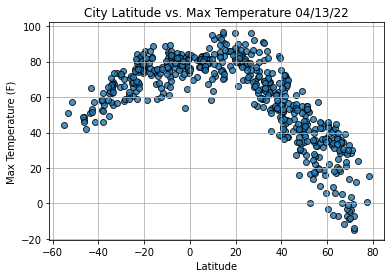

In [5]:
# Import the time module

import time

# Build scatter plot for latitude vs. max temp.

fig, ax = plt.subplots()
ax.scatter(lats, max_temps,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties

ax.set_title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))

ax.set_ylabel('Max Temperature (F)')

ax.set_xlabel('Latitude')

ax.grid(True)

# Save the figure in weather_data file

plt.savefig('weather_data/Fig1.png')

plt.show()

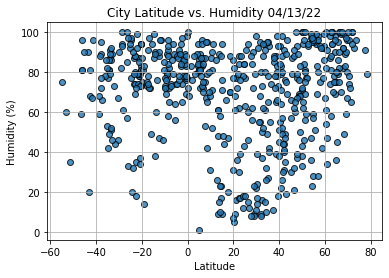

In [6]:
fig, ax = plt.subplots()
ax.scatter(lats, humidity,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

ax.set_title(f'City Latitude vs. Humidity '+ time.strftime('%x'))

ax.set_ylabel('Humidity (%)')

ax.set_xlabel('Latitude')

ax.grid(True)

plt.savefig('weather_data/Fig2.png')

plt.show()

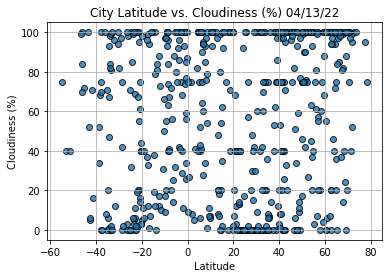

In [7]:
fig, ax = plt.subplots()
ax.scatter(lats, cloudiness,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

ax.set_title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))

ax.set_ylabel('Cloudiness (%)')

ax.set_xlabel('Latitude')

ax.grid(True)

plt.savefig('weather_data/Fig3.png')

plt.show()

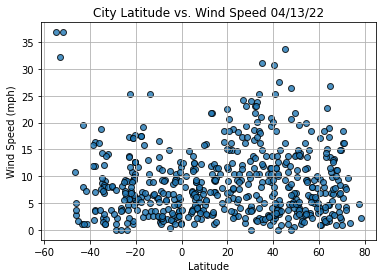

In [8]:
fig, ax = plt.subplots()
ax.scatter(lats, wind_speed,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

ax.set_title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))

ax.set_ylabel('Wind Speed (mph)')

ax.set_xlabel('Latitude')

ax.grid(True)

plt.savefig('weather_data/Fig4.png')

plt.show()

In [39]:
from scipy.stats import linregress

In [43]:


# Define the function for linear regression and plotting regression line
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Regression for hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculation of regression line
    regress_values = x_values * slope + intercept

    # Line equation
    line_eq = f'y={slope:.2f}x + {intercept:.2f}'

    # Scatter plot creation
    fig, ax = plt.subplots()
    ax.scatter(x_values, y_values)
    ax.plot(x_values, regress_values, 'r')
    ax.annotate(line_eq, text_coordinates, fontsize=15, color='red')

    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel(y_label)
    
    plt.show()
   

In [15]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2022-04-12 20:13:35
Lat                        -53.15
Long                     -70.9167
Max Temp                    51.12
Humidity                       60
Cloudiness                     40
Wind Speed                  32.21
Name: 13, dtype: object

In [17]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

In [25]:
northern_hemi_df.head()

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grand Forks,US,2022-04-12 20:13:06,47.9417,-97.4337,30.13,93,100,20.71
1,Upernavik,GL,2022-04-12 20:16:16,72.7868,-56.1549,12.04,92,100,9.64
4,Albany,US,2022-04-12 20:15:07,42.6001,-73.9662,68.04,35,0,3.00
7,Abonnema,NG,2022-04-12 20:16:17,4.7084,6.7931,80.89,80,100,3.67
9,Highland Park,US,2022-04-12 20:15:09,42.1817,-87.8003,71.35,40,75,10.00


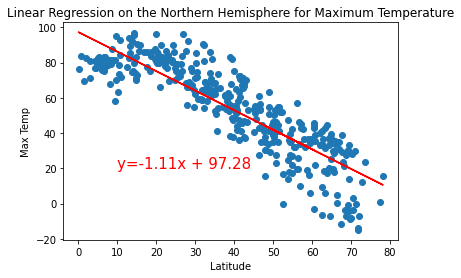

LinregressResult(slope=-1.108119968471091, intercept=97.27837363714055, rvalue=-0.8654525014898624, pvalue=8.27437885503111e-113, stderr=0.033393371730040096, intercept_stderr=1.447273888042131)

In [48]:
x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,20))

linregress(x_values, y_values)

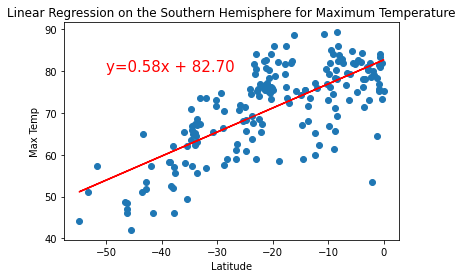

LinregressResult(slope=0.5757072310137227, intercept=82.69900774302462, rvalue=0.7244025163908743, pvalue=3.22388970868954e-31, stderr=0.04061093494722683, intercept_stderr=0.9778067736790756)

In [49]:
x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50, 80) )

linregress(x_values,y_values)

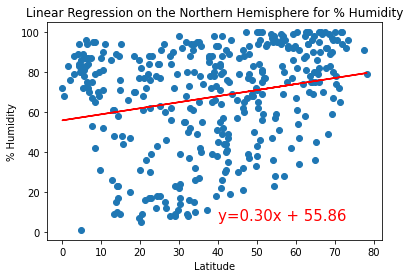

LinregressResult(slope=0.3031853088226883, intercept=55.860395274560055, rvalue=0.23188765639710698, pvalue=6.389823039481628e-06, stderr=0.06620873081505604, intercept_stderr=2.869496618780818)

In [60]:
x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (40, 6) )

linregress(x_values,y_values)

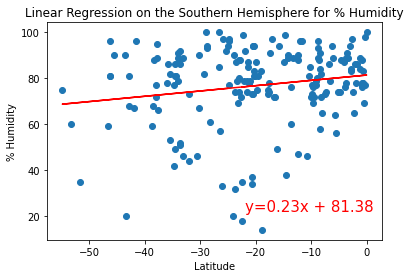

LinregressResult(slope=0.23119548321866976, intercept=81.37865510738878, rvalue=0.17440975313740906, pvalue=0.017891109426617372, stderr=0.0967531214936792, intercept_stderr=2.329566105632699)

In [61]:
x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-22, 22) )

linregress(x_values,y_values)

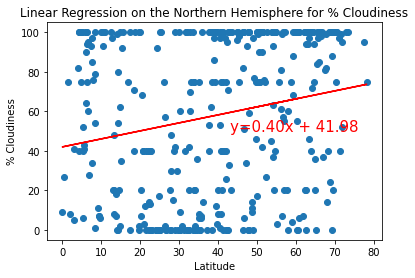

LinregressResult(slope=0.4048671311411516, intercept=41.97873788811573, rvalue=0.2047344103355984, pvalue=7.117834965614756e-05, stderr=0.10076512511374909, intercept_stderr=4.36717608456522)

In [67]:
x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (43, 50) )

linregress(x_values,y_values)

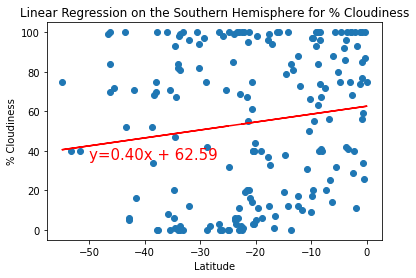

LinregressResult(slope=0.40153339558464746, intercept=62.5929698740053, rvalue=0.1430314375196712, pvalue=0.05275492868094802, stderr=0.205951996678161, intercept_stderr=4.958793922531642)

In [69]:
x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50, 36) )

linregress(x_values,y_values)

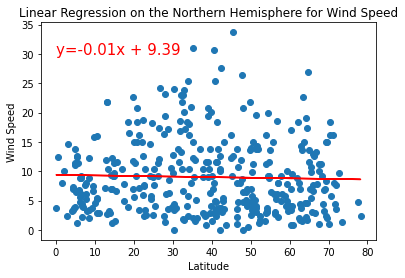

LinregressResult(slope=-0.009925108176706905, intercept=9.390398291358101, rvalue=-0.031310666902051004, pvalue=0.5477078901849304, stderr=0.01649364950682194, intercept_stderr=0.7148373168998859)

In [74]:
x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed', (0, 30) )

linregress(x_values,y_values)

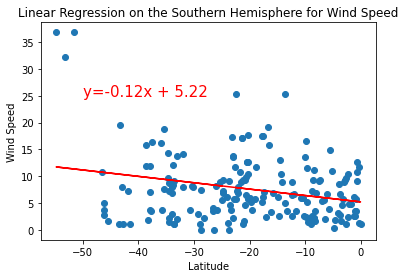

LinregressResult(slope=-0.11878116776411494, intercept=5.223052289651131, rvalue=-0.2547402700556884, pvalue=0.00048362276892166696, stderr=0.033422969869491115, intercept_stderr=0.8047390777220148)

In [76]:
x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed', (-50, 25) )

linregress(x_values,y_values)